<a href="https://colab.research.google.com/github/fairdown/data_analise/blob/master/CovidRj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Trazendo os Casos de COVID do RJ do dia 03/05/2020

In [0]:
!pip install squarify
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

covidrj = pd.read_csv("/content/covid19-RJ.csv")
covidrj.head()

,date,state,city,place_type,confirmed,deaths,is_last,estimated_population_2019,city_ibge_code,confirmed_per_100k_inhabitants,death_rate
0,2020-05-03,RJ,Angra dos Reis,city,56,0,True,203785.0,3300100.0,27.47994,0.0000
1,2020-05-03,RJ,Aperibé,city,2,0,True,11759.0,3300159.0,17.00825,0.0000
2,2020-05-03,RJ,Araruama,city,33,1,True,132400.0,3300209.0,24.92447,0.0303
3,2020-05-03,RJ,Areal,city,3,0,True,12572.0,3300225.0,23.86255,0.0000
4,2020-05-03,RJ,Armação dos Búzios,city,13,0,True,33870.0,3300233.0,38.38205,0.0000


#Buscando os Casos e Renomeando as Colunas

In [0]:
covidrj_casos = covidrj[["city", "confirmed"]]
covidrj_casos.columns = ['cidades', 'casos']

covidrj_casos.head()

,cidades,casos
0,Angra dos Reis,56
1,Aperibé,2
2,Araruama,33
3,Areal,3
4,Armação dos Búzios,13


#Organizando as linhas da coluna cidade

In [0]:
covidrj_casos = covidrj_casos.dropna()
covidrj_casos = covidrj_casos.query('cidades!="Importados/Indefinidos"')

covidrj_casos = covidrj_casos.sort_values('casos', ascending=False)
covidrj_casos.head()

,cidades,casos
60,Rio de Janeiro,6750
20,Duque de Caxias,484
43,Nova Iguaçu,435
41,Niterói,422
83,Volta Redonda,341


#Separando cidade do RJ das demais cidades

In [0]:
covid_RJ = covidrj_casos[covidrj_casos['cidades']=='Rio de Janeiro']
covid_RJ

,cidades,casos
60,Rio de Janeiro,6750


In [0]:
covid_outros = covidrj_casos[covidrj_casos['cidades']!='Rio de Janeiro']
covid_outros.head()

,cidades,casos
20,Duque de Caxias,484
43,Nova Iguaçu,435
41,Niterói,422
83,Volta Redonda,341
65,São Gonçalo,325


In [0]:
total_outros = covid_outros.casos.sum()
total_rj = int(covid_RJ.casos)

dados = { 'cidades':['Rio de Janeiro', 'Outras Cidades'],
        'casos':[total_rj, total_outros]
      }
c19 = pd.DataFrame(dados)
c19

,cidades,casos
0,Rio de Janeiro,6750
1,Outras Cidades,4389


#Comparando a cidade do Rio de Janeiro com as soma das demais cidades

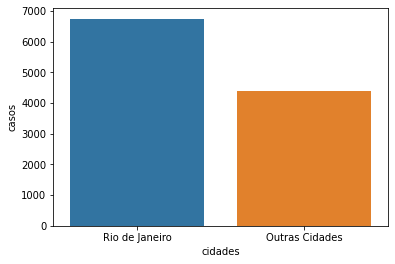

In [0]:
sns.barplot(data = c19, x = 'cidades', y = 'casos')

#Comparativo com as outras cidades do Estado do Rio de Janeiro

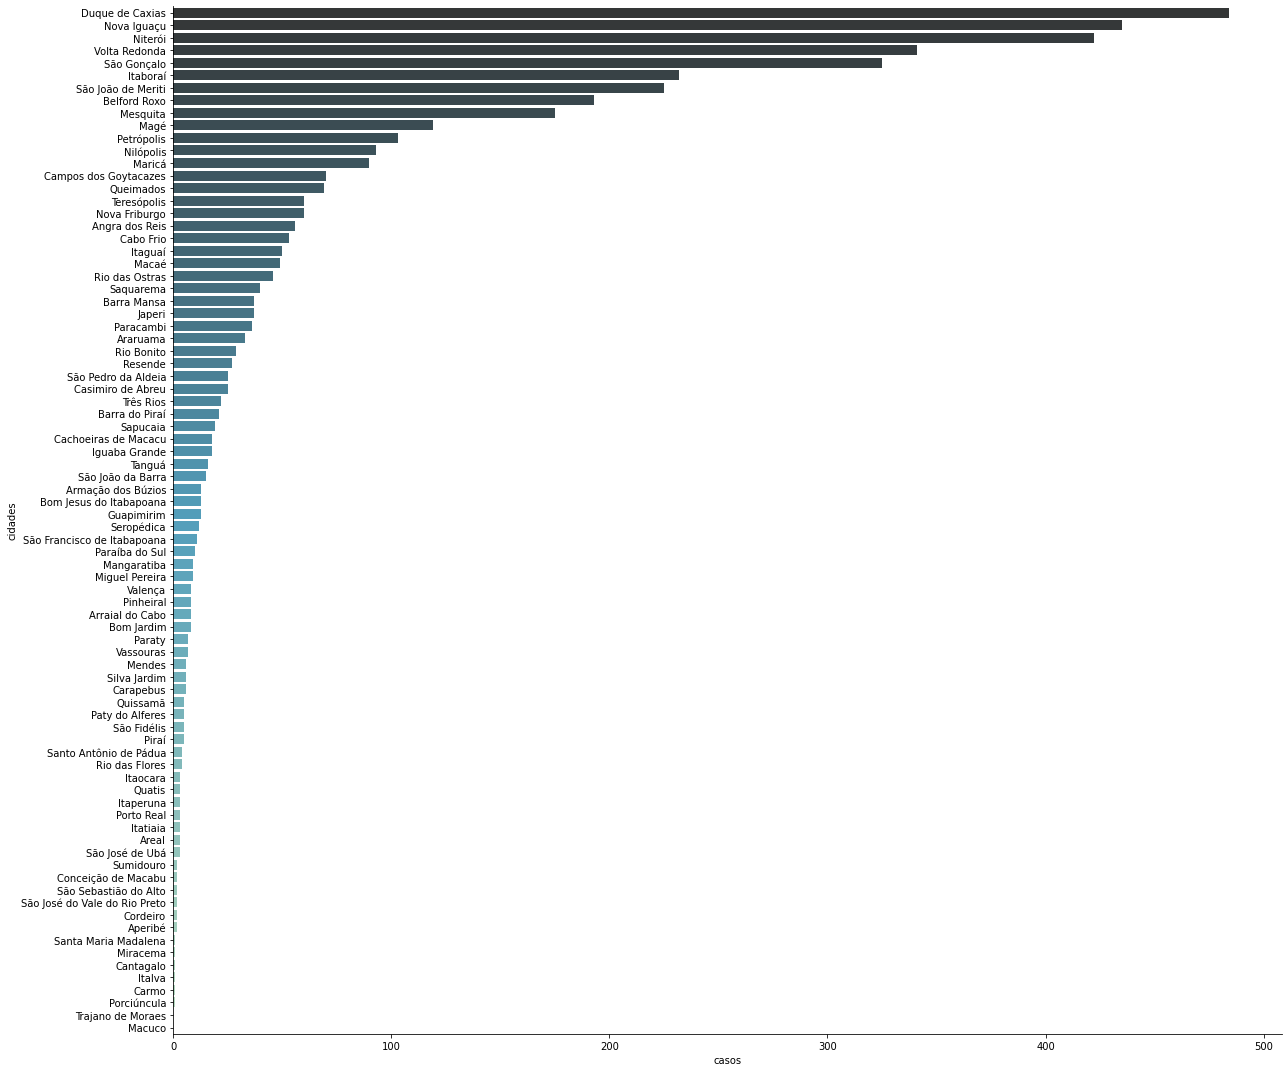

In [0]:

sns.catplot(data=covid_outros, x='casos', y= 'cidades', kind='bar', palette= 'GnBu_d',  height= 15, aspect=1.2)